<a href="https://colab.research.google.com/github/JuanD-Pimiento/CursoIA_MECATRONICA/blob/main/Ejercicio_FallaMotor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prueba con Falla de motor

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Cargue de datos

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Inteligencia_Artificial-2024/material de ejercicios/datosclases_rl.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   media de senal de vibracion      100 non-null    float64
 1    media de espectro de vibracion  100 non-null    float64
 2    falla                           100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


,media de senal de vibracion,media de espectro de vibracion,falla
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


#2. Separación de datos *train* y *split*

In [ ]:
X1 = df["media de senal de vibracion"]
X2 = df[" media de espectro de vibracion"]
Y1 = df[" falla"]
X1_train, X1_test, X2_train, X2_test, Y_train, Y_test = train_test_split(X1, X2, Y1, test_size=0.2, random_state=42)
X1_train.shape, X1_test.shape, X2_train.shape, X2_test.shape, Y_train.shape, Y_test.shape

,media de senal de vibracion
55,49.586677
88,78.635424
26,80.190181
42,94.443368
69,66.746719


#3. Entrenamiento del modelo

In [ ]:
modelo = LogisticRegression() #c=0.5 es el threshold
X1_train = np.array(X1_train).reshape(-1,1)
X2_train = np.array(X2_train).reshape(-1,1)
X_train = np.concatenate((X1_train, X2_train), axis=1)
modelo.fit(X_train, Y_train)

LogisticRegression()

#4. Probar el modelo

In [ ]:
X_test = np.concatenate((np.array(X1_test).reshape(-1,1), np.array(X2_test).reshape(-1,1)), axis=1)
Y_predict = modelo.predict(X_test)

#5. Matriz de confusión

In [ ]:
matrizConfusion = confusion_matrix(Y_test, Y_predict)
print(matrizConfusion)

[[7 1]
 [3 9]]


In [ ]:
def Y_heatConfusion(matrizConfucion):
  g = sns.heatmap(matrizConfucion, annot = True, xticklabels = ['Clase 0', 'Clase 1'], yticklabels = ['Clase 0', 'Clase 1'], cbar=False, cmap='Blues')
  g.set_title('Matriz de confusión')

Error del: 20.0%
Falsos negativos: 1
Falsos positivos: 3


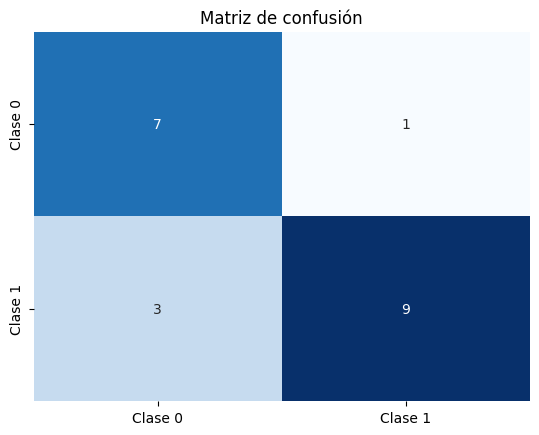

In [ ]:
Y_heatConfusion(matrizConfusion)
N, P = matrizConfusion
Fn = N[1]
Fp = P[0]
print(f"Error del: {(Fn+Fp)/len(Y_test)*100}%")
print(f"Falsos negativos: {Fn}")
print(f"Falsos positivos: {Fp}")